In [28]:
import librosa
import numpy as np

from pydub import AudioSegment
from pydub.playback import play

from librosa import feature
from librosa import core
import matplotlib.pyplot as plt
%matplotlib widget


In [ ]:
VOICE_FILE = '/mnt/c/Users/88698/Desktop/單字聽力/單字聽力/1 核心單字基本學習/核心單字基本學習 Day21.mp3'

In [ ]:
def to_normalized_array(audio_chunk, fs, librosa_fs):
   samples = audio_chunk.get_array_of_samples()
   arr = np.array(samples).astype(np.float32) / np.iinfo(np.int16).max
   return librosa.core.resample(arr, orig_sr=fs, target_sr=librosa_fs)

In [ ]:
audio_chunk = AudioSegment.from_mp3(VOICE_FILE)
audio_chunk = audio_chunk.set_sample_width(2).set_channels(1).set_frame_rate(44100)

In [ ]:
fs = 44100
librosa_fs = 16000
top_db = 40

In [ ]:
arr = to_normalized_array(audio_chunk, fs, librosa_fs)

In [ ]:
plt.plot(arr[10000:20000])

In [ ]:
mse = feature.rms(y=arr, frame_length=2048, hop_length=512)
mse_db = core.power_to_db(mse.squeeze(), ref=np.max, top_db=None)

In [ ]:
plt.plot(mse_db[:1000])

In [ ]:
percentile_parameter = 30     # [%]
extra_db_parameter = 0        # [dB]
threshold = (np.percentile(mse_db, percentile_parameter) + extra_db_parameter) * -1

edges = librosa.effects.split(arr, top_db=threshold) / librosa_fs


In [ ]:
def show_each_non_silent(wave, edges, fig, ax):
    # i = 0
    # edges = (edges * arr.shape[0] / edges.max()).astype(np.int32)

    # def press(event):
    #     global i
    #     i += 1
    #     ax.cla()
    #     ax.set_title(i)
    #     ax.plot(wave[edges[i, 0]:edges[i, 1]])

    # fig, ax = plt.subplots()
    # fig.canvas.mpl_connect('button_press_event', press)
    # imgplot = ax.plot(wave[edges[i, 0]:edges[i, 1]])
    # plt.show()

    # just some random data 
    frames = [np.random.randint(10, size=10) for _ in range(100)]
    i = 0

    # event listener 
    def press(event):
        global i
        i += 1
        ax.cla()
        ax.set_title(i)
        ax.plot(frames[i])

    cid = fig.canvas.mpl_connect('button_press_event', press)
    imgplot, = ax.plot(frames[i])

    return cid

In [26]:
class SildePlot:
    def __init__(self, line, ax, data, edges):
        self.line = line
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)
        self.ax = ax
        self.data = data
        self.i = 0
        self.edges = (edges * arr.shape[0] / edges.max()).astype(np.int32)

    def __call__(self, event):
        # if event.inaxes!=self.line.axes: return
        self.ax.cla()
        self.ax.set_title(self.i)
        self.ax.plot(self.data[self.edges[self.i, 0]:self.edges[self.i, 1]])
        # self.ax.plot(np.random.randint(10, size=10)) # for debug
        self.i += 1

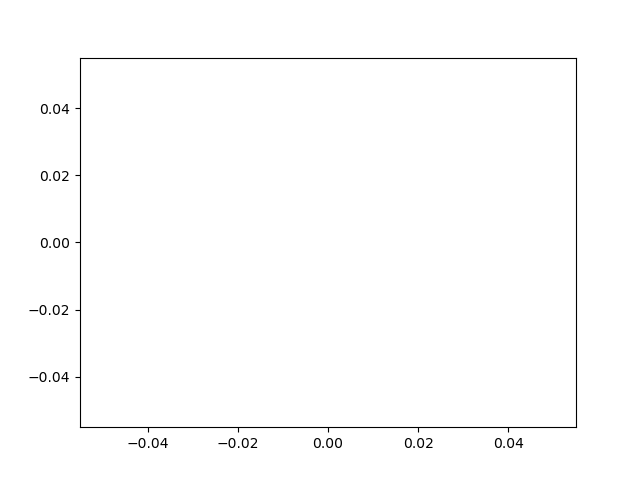

In [27]:
fig, ax = plt.subplots()
line, = ax.plot([0], [0])  # empty line
linebuilder = SildePlot(line, ax, arr, edges)

plt.show()

In [25]:
audio_chunk.

array([[   4634,   18021],
       [  18536,   30894],
       [  40163,   44282],
       [  45312,   55095],
       [  91654,  100408],
       [ 115340,  123064],
       [ 132847,  141601],
       [ 152929,  162712],
       [ 165801,  175585],
       [ 184853,  192062],
       [ 193607,  197726],
       [ 206480,  214203],
       [ 215748,  217808],
       [ 226561,  234285],
       [ 235830,  239434],
       [ 250762,  270329],
       [ 274963,  289381],
       [ 300709,  304828],
       [ 305858,  310492],
       [ 319760,  322850],
       [ 324395,  326969],
       [ 335208,  338812],
       [ 340872,  344476],
       [ 353230,  363013],
       [ 366617,  376916],
       [ 389274,  391848],
       [ 393908,  397512],
       [ 409355,  411930],
       [ 414504,  418624],
       [ 427377,  429952],
       [ 432526,  437161],
       [ 449004,  457242],
       [ 460847,  469085],
       [ 478354,  482988],
       [ 484533,  490197],
       [ 499465,  508733],
       [ 519547,  523666],
 